In [1]:
from google.colab import drive
drive.mount('/content/drives')

Mounted at /content/drives


In [2]:
!pip install Pillow

Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pathlib
import os
import hashlib
from PIL import Image

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [4]:
def remove_duplicate_images(image_folder):
    unique_images = set()
    duplicates = []

    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(image_folder, filename)
            with Image.open(file_path) as img:
                # Menghitung hash dari gambar
                img_hash = hashlib.md5(img.tobytes()).hexdigest()
                print(f'Processing {filename} with hash: {img_hash}')
                # Debugging
                if img_hash in unique_images:
                    duplicates.append(file_path)
                else:
                    unique_images.add(img_hash)

    # Menampilkan gambar duplikat sebelum menghapus
    if duplicates:
        print("Gambar duplikat yang akan dihapus:")
        for duplicate in duplicates:
            print(duplicate)
    else:
        print("Tidak ada gambar duplikat ditemukan.")


In [5]:
# Menggunakan path yang Anda berikan
remove_duplicate_images("/content/drives/MyDrive/Skin Disease/IMG_CLASSES")

Tidak ada gambar duplikat ditemukan.


Loading and Preprocessing the data

In [6]:
#define the path and split your data into training and validation split
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drives/MyDrive/Skin Disease/IMG_CLASSES")
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drives/MyDrive/Skin Disease/IMG_CLASSES",
    validation_split=0.2,
    subset="training",
    seed=123)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drives/MyDrive/Skin Disease/IMG_CLASSES",
    validation_split=0.2,
    subset="validation",
    seed=123,
)

Found 7000 files belonging to 5 classes.
Found 7000 files belonging to 5 classes.
Using 5600 files for training.
Found 7000 files belonging to 5 classes.
Using 1400 files for validation.


In [7]:
#define the batch size and print the image labels
import tensorflow_datasets as tfds

batch_size = 64

dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['1. Eczema 1.000', '2. Melanoma 2.000', '3. Atopic Dermatitis - 1.000', '4. Basal Cell Carcinoma (BCC) 1.000', '5. Melanocytic Nevi (NV) - 2000']


In [8]:
#resize your images and standardize you data to make it for a neural network
#standardize your data
size = (512, 512)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))

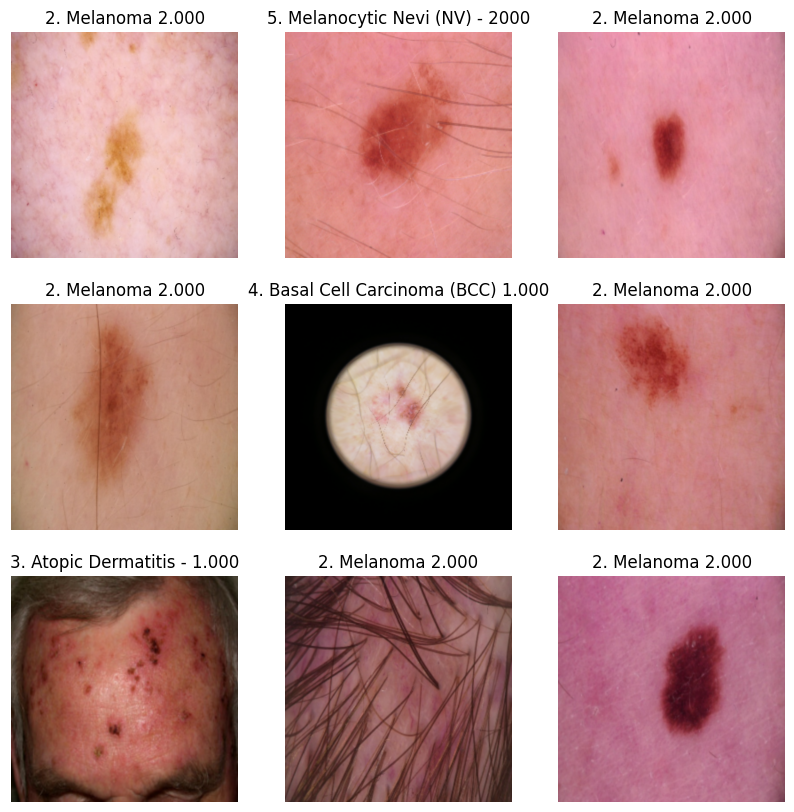

In [10]:
# display the first 9 images
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
#do further preprocessing to increase the instances of images

image = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2, -0.3), width_factor=(-0.2, -0.3), interpolation='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        ],
        name="image",
)

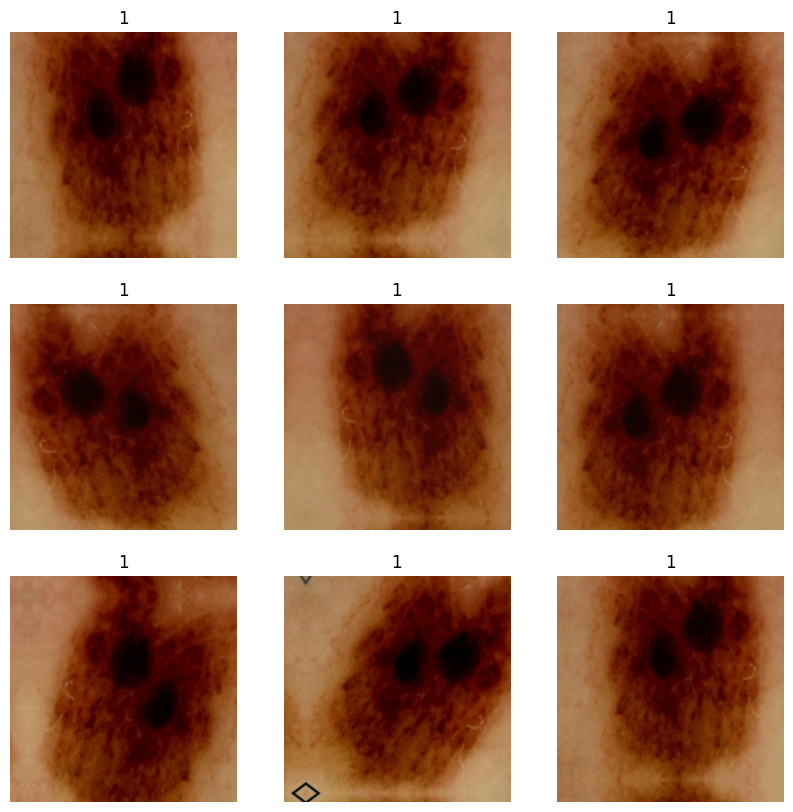

In [12]:
import numpy as np

for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  first_image = images[0]
  def f(x):
    return np.int32(x)
  f2 = np.vectorize(f)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = image(
        tf.expand_dims(first_image, 0), training=True
    )
    plt.imshow(augmented_image[0].numpy().astype(np.int32))
    plt.title(f2(labels[0]))
    plt.axis("off")